# Исследование надёжности заёмщиков

## Обзор данных

Импортируем библиотеку Pandas для работы с таблицами.    И тут же библиотеку Seaborn для построения визуализаций в ходе выполнения проекта.

In [23]:
import pandas as pd
import seaborn as sns

Прочитаем файл `data.csv` и сохраним его в переменной `df`:

In [24]:
df = pd.read_csv('.../data.csv')

Выведем на экран первые 10 строк таблицы для ознакомления с её структурой:

In [25]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Также ознакомимся с общей информацией о таблице `df`:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 12 столбцов с тремя типами данных: _float_, _int_ и _object_.
    
Согласно документации к данным:
    
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях;
* `dob_years` — возраст клиента в годах;
* `education` — уровень образования клиента;
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение;
* `family_status_id` — идентификатор семейного положения;
* `gender` — пол клиента;
* `income_type` — тип занятости;
* `debt` — имел ли задолженность по возврату кредитов;
* `total_income` — ежемесячный доход;
* `purpose` — цель получения кредита.

**Выводы**

Названия столбцов таблицы корректны.
Каждая строка соответствует одному заёмщику.
Количество значений в двух столбцах меньше, чем в остальных — значит, в данных есть пропуски.
В таблице присутствуют как количественные, так и категорийные данные. Не везде оптимален выбор типа данных.
Также обращают на себя внимание отрицательные числа в колонке стажа и неунифицированные значения в колонках об образовании и цели получения кредита.

Предварительно можно утверждать, что, данных достаточно для исследования. Однако необходимо провести предобработку.

## Предобработка данных

### Заполнение пропусков

Итак, вывод общей информации о таблице показал наличие пропусков данных в столбцах `days_employed` и `total_income`. Причём количество пропущенных значений в колонках одинаковое, поэтому можно предположить, что пропущены они в одних и тех же строках.
Проверим, так ли это.

In [27]:
df[(df['days_employed'].isna()) & (df['total_income'].isna())].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Действительно, данные об общем трудовом стаже и ежемесячном доходе отсутствуют у одних и тех же заёмщиков.

Теперь проверим, какую долю составляют эти пропущенные значения. Достаточно будет проверки лишь по одному столбцу.

In [28]:
df['days_employed'].isna().sum() / df.shape[0]

0.10099883855981417

<a id="медианы"></a>
Пропущено 10 % значений. Это большая доля, а механизм формирования пропусков похож на неслучайный (MNAR): данные отсутствуют попарно, при этом не наблюдается корреляции с другими значениями. Вероятно, к появлению этих пропусков привели какие-то технические ошибки при формировании/выгрузке базы данных, возможно, совмещении таблиц.
Удаление такого процента строк может очень сильно искозить результат исследования, поэтому избавляться от строк с пропущенными значениями в данном случае нельзя. Пропуски нужно заполнить.

В целом, цель исследования не предполагает описание зависимости платёжеспособности клиента от его дохода или трудового стажа, но данные могут понадобиться при категоризации заёмщиков, поэтому для адекватного представления данных пропуски будет уместно *заполнить медианным значением* по столбцу: значения дохода и стажа могут сильно выделяться среди большинства, и среднее значение будет некорректно характеризовать данные. 

Однако, на медианы будут влиять аномальные значения в столбцах, а также возможные дубликаты. Поэтому прежде избавимся от них и вернёмся к пропускам в [пункте 2.3](#1медианы).

### Проверка данных на аномалии и исправления

В столбце `days_employed`, который содержит данные о трудовом стаже в днях, есть отрицательные значения. Это аномальные значения, также, вероятно, возникшие в результате ошибок при формировании базы данных.
Обработаем значения в этом столбце, заменив значения в нём на абсолютные.

In [29]:
df['days_employed'] = df['days_employed'].abs()
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


В пятой строке можно заметить аномально большое значение — больше 1000 лет трудового стажа. Проверим, какие ещё нереальные значения скрываются в этом столбце, отсортировав датафрейм по убыванию в колонке `days_employed`.

In [30]:
df.sort_values(by='days_employed', ascending=False).head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба


Похоже, что строк с тысячелетними значениями стажа в таблице много.

In [31]:
df[df['days_employed'] > 20000]['days_employed'].count()

3445

А именно, 3445.

Примечательно, что в последнем отсортированном выводе таблицы все строки имеют категорию `пенсионер` в колонке `income_type`.
Проверим, принадлежат ли все строки с артефактами к какой-то определённой категории типа занятости.

In [32]:
df.groupby('income_type').agg({'days_employed': ['min', 'max']})

days_employed               
                           min            max
income_type                                  
безработный      337524.466835  395302.838654
в декрете          3296.759962    3296.759962
госслужащий          39.954170   15193.032201
компаньон            30.195337   17615.563266
пенсионер        328728.720605  401755.400475
предприниматель     520.848083     520.848083
сотрудник            24.141633   18388.949901
студент             578.751554     578.751554

Теперь видно, что проблема с отображением стажа внутри двух категорий типа занятости — `пенсионер` и `безработный`.

Для данного исследования не очень важно, как именно будут (и будут ли вообще) заменены аномальные значения в колонке стажа заёмщиков, но для адекватного представления данных заменим их следующим образом:
- всем пенсионерам присвоим стаж, равный максимальному значению стажа в категории 'сотрудник',
- всем безработным присвоим средний стаж категории 'госслужащий'.

In [33]:
df.loc[df['income_type'] == 'пенсионер', 'days_employed'] = df[df['income_type'] == 'сотрудник']['days_employed'].max()
df.loc[df['income_type'] == 'безработный', 'days_employed'] = df[df['income_type'] == 'госслужащий']['days_employed'].mean()

df.groupby('income_type').agg({'days_employed': ['min', 'max']})

days_employed              
                          min           max
income_type                                
безработный       3399.896902   3399.896902
в декрете         3296.759962   3296.759962
госслужащий         39.954170  15193.032201
компаньон           30.195337  17615.563266
пенсионер        18388.949901  18388.949901
предприниматель    520.848083    520.848083
сотрудник           24.141633  18388.949901
студент            578.751554    578.751554

Проверим также  значения в колонках `children` и `dob_years`.

In [34]:
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

In [35]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Среди уникальных значений в колонке `dob_years` встречается `0`, что является аномальным значением. Но реальный возраст заёмщика в этом случае неизвестен и не важен в исследовании, а остальные значения корректны, поэтому оставим этот столбец без изменений.

А вот в столбце `children` встречается два аномальных значения, которые без корректировки окажут влияние на исследование. Это отрицательное значение `-1` и довольно высокое значение `20`. Довольно маловероятно, что 76 человек в выборке имеют по 20 детей, а вот клавиши "2" и "0" на числовой клавиатуре находятся рядом, поэтому допустим, что это ошибка, и заменим  *20*  на  *2*, а  *-1*  на  *1*.

In [36]:
df.loc[df['children'] == -1, 'children'] = 1
df.loc[df['children'] == 20, 'children'] = 2

df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

### Удаление дубликатов

Уже при обзоре таблицы бросалось в глаза наличие неявных дубликатов в столбце `education`: одни и те же значения тут записаны по-разному — с использованием заглавных и строчных букв. Приведём все значения столбца к нижнему регистру.

In [37]:
df['education'] = df['education'].str.lower()

Далее посмотрим на варианты значений в столбце `family_status`.

In [38]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [39]:
df['family_status'] = df['family_status'].str.lower() #  приведём значения в столбце к нижнему регистру

<a id="целикредита"></a>
Также проверим значения колонки с целью кредита.

In [40]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

В столбце обнаруживается большое количество одинаковых по смыслу, но разных по написанию значений. Видимо, это поле в анкете (как и поле с образованием) заполнялось заёмщиком/сотрудником банка вручную — отсюда многократное дублирование целей в разнообразных формулировках.
Для выполнения задач исследования прибегнем к категоризации по цели кредита в [пункте 3.3](#категоризация_целей).
Пока оставим колонку без изменений.

Теперь проверим наличие и посчитаем количество явных дубликатов в таблице.

In [41]:
df.duplicated().sum()

71

Удалим явные дубликаты и обновим индексацию в датафрейме.

In [42]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

<a id="1медианы"></a>

Теперь, когда мы избавились от дубликатов и аномалий в таблице, нужно вернуться к [пункту 2.1](#медианы) и заполнить пропуски в столбцах `days_employed` и `total_income` медианными значениями.

Дни заменим общей медианой.

In [43]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())

df['days_employed'].isna().sum() # проверка

0

А для заполнения пропусков с доходом возьмём медианное значение в разрезе категорий дохода `income_type`. Так мы не усредним данные и меньше повлияем на распределение.

In [44]:
for t in df['income_type'].unique():
    df.loc[(df['income_type'] == t) & (df['total_income'].isna()), 'total_income'] = \
    df.loc[(df['income_type'] == t), 'total_income'].median()
    
df['income_type'].isna().sum() # проверка

0

### Изменение типов данных

Ещё раз взглянем на типы данных в столбцах датафрейма.

In [45]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Вещественный тип данных в столбцах `days_employed` и `total_income` вполне можно заменить на целочисленный.

In [46]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

Проверим информацию о таблице после всех преобразований.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21454 non-null  int64 
 1   days_employed     21454 non-null  int32 
 2   dob_years         21454 non-null  int64 
 3   education         21454 non-null  object
 4   education_id      21454 non-null  int64 
 5   family_status     21454 non-null  object
 6   family_status_id  21454 non-null  int64 
 7   gender            21454 non-null  object
 8   income_type       21454 non-null  object
 9   debt              21454 non-null  int64 
 10  total_income      21454 non-null  int32 
 11  purpose           21454 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


**Выводы**

Итак, мы подготовили данные: избавились от явных и неявных дубликатов, пропусков значений и аномалий, которые могли бы оказать влияние на исследование; откорректировали типы данных в колонках для их лучшей репреентации информации.
Теперь можно переходить к поиску ответа в соответствии с целью исследования.

## Исследование

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

Создим два новых датафрейма, в которых:
* каждому уникальному значению из `education` соответствует уникальное значение `education_id` — в первом;
* каждому уникальному значению из `family_status` соответствует уникальное значение `family_status_id` — во втором.

In [48]:
education_log = df[['education_id', 'education']].drop_duplicates().reset_index(drop=True)
family_status_log = df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)

display(education_log)
family_status_log

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Из оригинального датафрейма удалим столбцы `education` и `family_status`, оставив только идентификаторы. Об их значении будем узнавать из новых "словарей".

In [49]:
df.drop(columns=['education', 'family_status'], axis=1, inplace=True)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,18388,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация дохода

На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:
- 0–30000 — `E`;
- 30001–50000 — `D`;
- 50001–200000 — `C`;
- 200001–1000000 — `B`;
- 1000001 и выше — `A`.

Для этого напишем функцию `income_category`:

In [50]:
# функция принимает в качестве аргумента доход клиента и возвращает категорию дохода

def income_category(income):
    if income <= 30000:
        return 'E'
    if income <=50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <=1000000:
        return 'B'
    return 'A'

# проверка работы функции
display(income_category(10000))
display(income_category(51000))
display(income_category(1300000))

'E'

'C'

'A'

Теперь создадим отдельный столбец с категориями доходов, и в его ячейки запишем значения, возвращаемые функцией.

In [51]:
df['total_income_category'] = df['total_income'].apply(income_category)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,18388,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Категоризация целей кредита

<a id="категоризация_целей"></a>
Для категоризации целей кредита создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:
- `операции с автомобилем`,
- `операции с недвижимостью`,
- `проведение свадьбы`,
- `получение образования`. 

Уникальные значения в столбце `purpose` рассматривали в [пункте 2.3](#целикредита).

In [52]:
# функция принимает в качестве аргумента подстроку, ищет в ней соответствие по ключевым словам
# и возвращает категорию цели кредита

def purpose_category(purpose):
    if 'автомобил' in purpose:
        return 'операции с автомобилем'
    if 'недвиж' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    if 'образовани' in purpose:
        return 'получение образования'
    return 'другое'

# проверка работы функции
display(purpose_category('получить образование'))
display(purpose_category('на свадьбу'))
display(purpose_category('покупка коммерческой недвижимости'))
display(purpose_category('свой автомобиль'))

'получение образования'

'проведение свадьбы'

'операции с недвижимостью'

'операции с автомобилем'

Теперь формируем новый столбец с категориями целей кредита, избавляемся от ненужных больше столбцов `total_income` и `purpose` и проверяем финальный вид таблицы.

In [53]:
df['purpose_category'] = df['purpose'].apply(purpose_category)

df.drop(columns=['total_income', 'purpose'], axis=1, inplace=True)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,B,получение образования
4,0,18388,53,1,1,F,пенсионер,0,C,проведение свадьбы


### Ответы на вопросы

#### Вопрос 1:

**Зависимость между количеством детей и возвратом кредита в срок**

Для ответа на вопрос, есть ли зависимость между количеством детей и возвратом кредита в срок, выведем необходимые данные в сводной таблице.

In [54]:
# для параметра values берём любой столбец - нужно посчитать лишь количество строк
children_debt = df.pivot_table(index='children', columns='debt', values='purpose_category', aggfunc='count').reset_index()
children_debt

debt,children,0,1
0,0,13028.0,1063.0
1,1,4410.0,445.0
2,2,1926.0,202.0
3,3,303.0,27.0
4,4,37.0,4.0
5,5,9.0,NaN


Чтобы иметь возможность сравнить наличие долга по кредитам в группах разной численности, посчитаем и запишем в новую колонку `debt_share` долю невозвратов в срок.

In [55]:
children_debt[1] = children_debt[1].fillna(0) # заполним пропуск нулём, чтобы он не повлиял на рассчёты

children_debt['debt_percentage'] = (children_debt[1] / (children_debt[0] + children_debt[1]) * 100).round(1)
children_debt

debt,children,0,1,debt_percentage
0,0,13028.0,1063.0,7.5
1,1,4410.0,445.0,9.2
2,2,1926.0,202.0,9.5
3,3,303.0,27.0,8.2
4,4,37.0,4.0,9.8
5,5,9.0,0.0,0.0


Теперь можно сравнить данные в новом столбце. Для наглядности построим гистограмму.

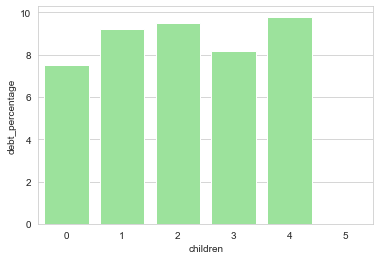

In [70]:
sns.set_style('whitegrid')
sns.barplot(x='children', y='debt_percentage', data=children_debt, 
            color='lightgreen');

#### Вывод 1:

На основании полученных данных можно сделать вывод, что **количество детей у заёмщика не оказывает значительного влияния на факт погашения кредита в срок**. У всех категорий процент невозврата находится в диапазоне 7-10 %. Совсем нет долгов лишь у малочисленной категории с пятью детьми - это нерепрезентативная выборка, поэтому нельзя учитывать её влияние на общий результат.
Тем не менее, можно отметить, что меньше всего задолжностей имеют бездетные заёмщики.

#### Вопрос 2:

**Зависимость между семейным положением и возвратом кредита в срок**

Для ответа на вопрос, есть ли зависимость между семейным положением и возвратом кредита в срок, выведем необходимые данные в сводной таблице.

In [65]:
family_debt = df.pivot_table(index='family_status_id', columns='debt', values='purpose_category', aggfunc='count').reset_index()
family_debt

debt,family_status_id,0,1
0,0,11408,931
1,1,3763,388
2,2,896,63
3,3,1110,85
4,4,2536,274


Объединим сводную таблицу со "словарём" значений семейного положения и по аналогии с предыдущим пунктом рассчитаем в процентах долю невыплат по каждой категории.

In [66]:
family_debt = family_debt.merge(right=family_status_log, on='family_status_id')
family_debt['debt_percentage'] = (family_debt[1] / (family_debt[0] + family_debt[1]) * 100).round(1)
family_debt

,family_status_id,0,1,family_status,debt_percentage
0,0,11408,931,женат / замужем,7.5
1,1,3763,388,гражданский брак,9.3
2,2,896,63,вдовец / вдова,6.6
3,3,1110,85,в разводе,7.1
4,4,2536,274,не женат / не замужем,9.8


Построим гистограмму.

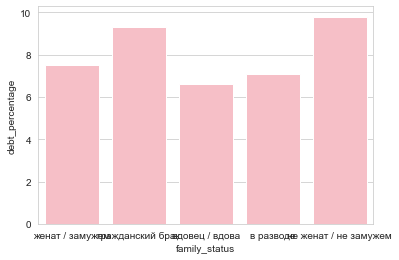

In [67]:
sns.barplot(x='family_status', y='debt_percentage', data=family_debt, color='lightpink');

#### Вывод 2:

Как и при проверке предыдущей гипотезы, полученные данные показывают, что **семейное положение заёмщика не оказывает *значительного* влияния на факт погашения кредита в срок**. У всех категорий процент невозврата находится в диапазоне 6-10 %. Это небольшой разброс.
Однако, меньше всего задолжностей у клиентов в категориях `вдовец / вдова` и `в разводе`, а больше, чем у остальных, -- в категории `не женат / не замужем	`.

#### Вопрос 3:

**Зависимость между уровнем дохода и возвратом кредита в срок**

Аналогично действиям в предыдущих пунктах сформируем сводную таблицу по категориям дохода и задолжностям по кредиту и посчитаем в процентах долю задолжностей в каждой категории.

In [71]:
income_debt = df.pivot_table(index='total_income_category', columns='debt', values='purpose_category', aggfunc='count').reset_index()
income_debt['debt_percentage'] = (income_debt[1] / (income_debt[0] + income_debt[1]) * 100).round(1)
income_debt

debt,total_income_category,0,1,debt_percentage
0,A,23,2,8.0
1,B,4686,356,7.1
2,C,14655,1360,8.5
3,D,329,21,6.0
4,E,20,2,9.1


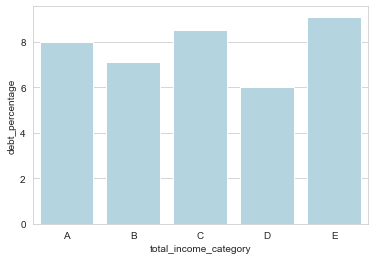

In [72]:
#строим гистограмму
sns.barplot(x='total_income_category', y='debt_percentage', data=income_debt, color='lightblue');

#### Вывод 3:

Снова не очень большой разброс данных. **Задолжностей больше всего у заёмщиков в категории с наименьшим доходом - `E`**. Однако платёжеспособность не коррелирует с повышением дохода. Прилежнее всего долг возвращают люди с доходом от 30000 до 50000 (категория `D`).

#### Вопрос 4:

**Влияние цели кредита на его возврат в срок**



Формируем сводную таблицу по целям кредита и задолжностям по кредиту и считаем в процентах долю задолжностей в каждой категории.

In [73]:
purpose_debt = df.pivot_table(index='purpose_category', columns='debt', values='total_income_category', aggfunc='count').reset_index()
purpose_debt['debt_percentage'] = (purpose_debt[1] / (purpose_debt[0] + purpose_debt[1]) * 100).round(1)
purpose_debt

debt,purpose_category,0,1,debt_percentage
0,операции с автомобилем,3903,403,9.4
1,операции с недвижимостью,10029,782,7.2
2,получение образования,3643,370,9.2
3,проведение свадьбы,2138,186,8.0


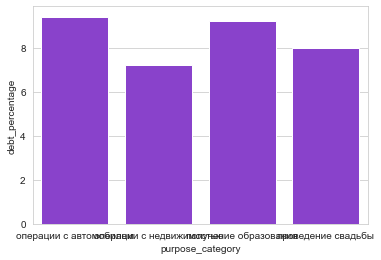

In [74]:
# гистограмма
sns.barplot(x='purpose_category', y='debt_percentage', data=purpose_debt, color='blueviolet');

#### Вывод 4:

Сравнительно высокий процент задолженности показывают кредиты на автомобили и образование - по 9,3 %. **Лучше всего люди возвращают деньги по ипотечным займам**.

## Общий вывод:

В ходе выполнения проекта был выполнен обзор данных и, на основании выявленных недочётов, их предобработка: заполнены пропуски, изучены и исправлены аномалии, оптимизированы типы данных и удалены дубликаты.

Для осуществления анализа были сформированы дополнительные датафреймы словарей, проведена декомпозиция исходного датафрейма, а также категоризация доходов клиентов и целей кредита.

На основании подготовленных данных исследована и визуализирована зависимость между кредитными задолжностями и жизненными обстоятельствами заёмщика: количеством детей, семейным положением, категорией дохода, целью кредитования.

Несмотря на то, что данные не показали какого-то значительного разброса ни по одному из проверяемых критериев, обстоятельства заёмщика всё-таки, похоже, влияют на его/её платёжеспособность. Самый "надёжный" клиент -- бездетный вдовец, приобретающий недвижимость, с доходом в 30-50 тыс. руб.